< 출처 : 박조은 강사님 [Github](https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb) >

참고 URL :

* [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

* [Novice to Grandmaster | Kaggle](https://www.kaggle.com/ash316/novice-to-grandmaster)

* 캐글을 시작한지 두 달정도 된 초보자로, 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설을 세워본다.

In [1]:
#구글 드라이브 연동하기
#구글 드라이브에 데이터를 올린 후 사용할 경우에만 실행
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

question = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/schema.csv')
question.shape

(290, 3)

##Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?

In [3]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [4]:
mcq = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

<Axes: >

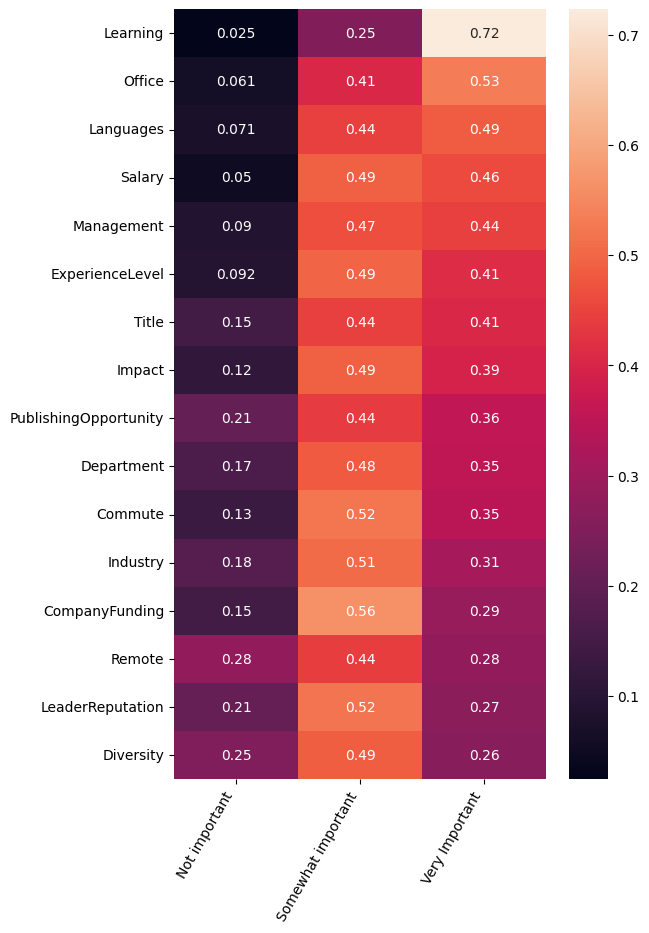

In [5]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important',
                             ascending=False), annot=True)

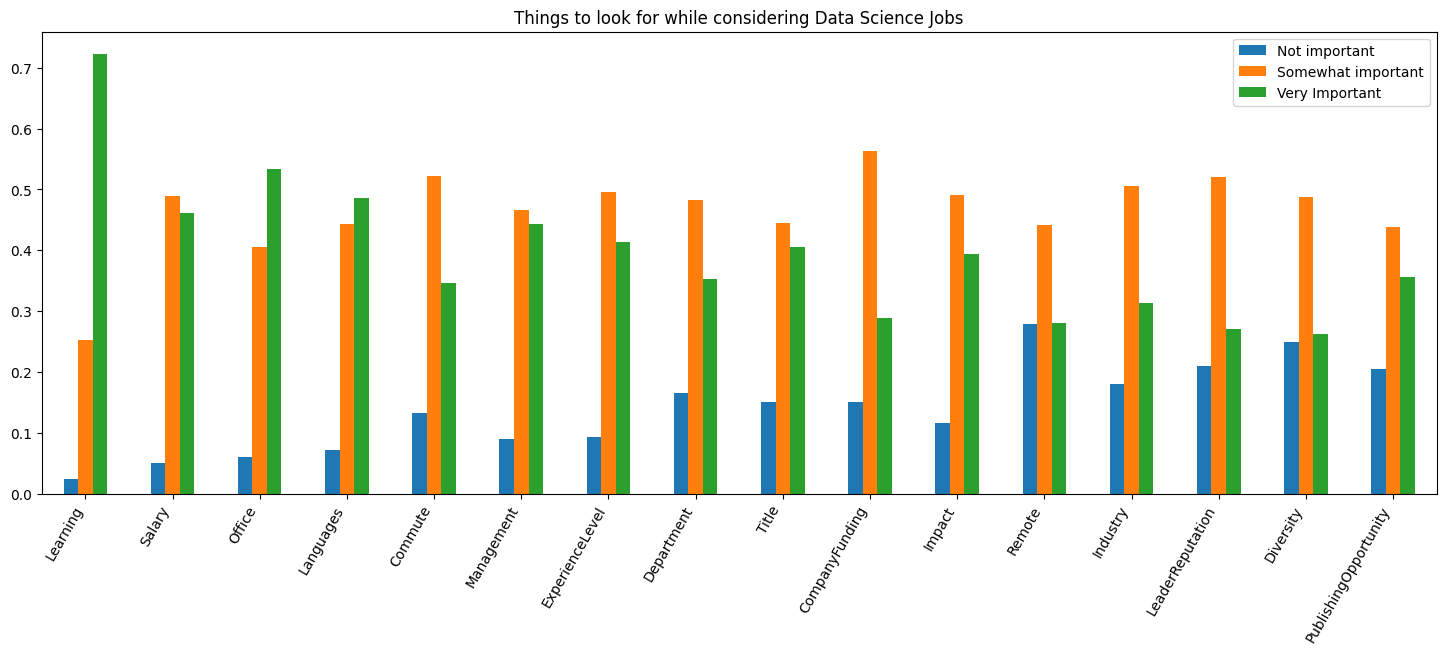

In [6]:
jfdf.plot(kind='bar', figsize=(18,6),
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

데이터 사이언티스트로 직업을 찾을 때 가장 고려할 요소는 배울 수 있는 곳인지, 사무실 근무환경, 프레임워크나 언어, 급여, 경영상태, 경력정도 순이다.

##Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

<Axes: xlabel='count', ylabel='UniversityImportance'>

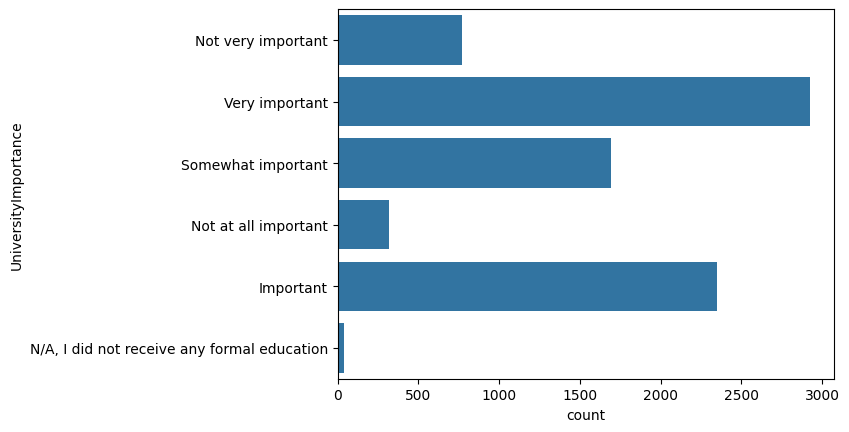

In [7]:
sns.countplot(y='UniversityImportance', data=mcq)

In [8]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist,group_labels)
py.iplot(fig, filename='University Importance by Age')

{결과 그래프는 영상 참고}

마치 연령대 그래프를 찍어 본것과 같은 형태의 그래프다. 20~30대는 대학 학위가 매우 중요하다고 생각하며, 연령대가 높은 응답자들은 그다지 중요하지 않다고 응답했다. 300명 미만의 응답자만이 학위가 중요하지 않다고 생각한다.

대부분의 응답자가 석사와 박사인 것을 고려해 봤을 때 이는 자연스러운 응답이다.

##Q13. 어디에서 부터 데이터사이언스를 시작해야 할까요?

In [9]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

<Axes: xlabel='count', ylabel='FirstTrainingSelect'>

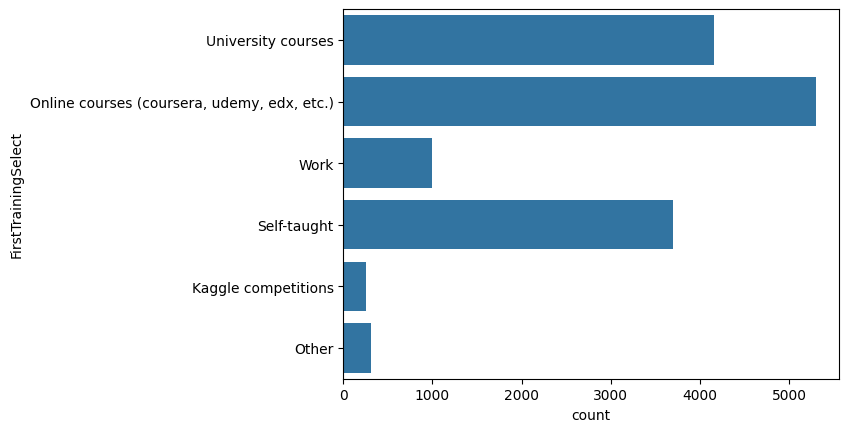

In [10]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

대부분의 응답자가 학사학위 이상으로 대학교육에 대한 중요성을 부여했지만, 가장 많은 응답자가 코세라, 유데미와 같은 온라인 코스를 통해 데이터 사이언스를 공부했고 그 다음으로 대학교육이 차지하고 있다.

개인프로젝트를 해보는 것도 중요하다고 답한 응답자가 제법 된다.

##Q14. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

<Axes: xlabel='count', ylabel='ProveKnowledgeSelect'>

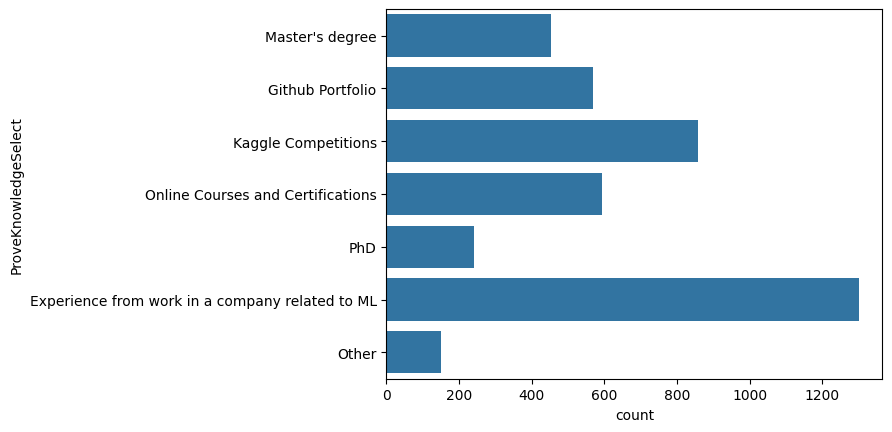

In [11]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

머신러닝과 관련 된 직무경험이 가장 중요하고 다음으로 캐글 경진대회의 결과가 중요하다고 답했다. 그리고 온라인 강좌의 수료증이나 깃헙 포트폴리오 순으로 중요하다고 답했다.

##Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

scikit과 같은 라이브러리는 세부 정보를 추상화하여 기본기술을 몰라도 ML 모델을 프로그래밍 할 수 있다. 그럼에도 그 안에 있는 수학을 아는 것이 중요할까?

In [12]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [13]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

<Axes: xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

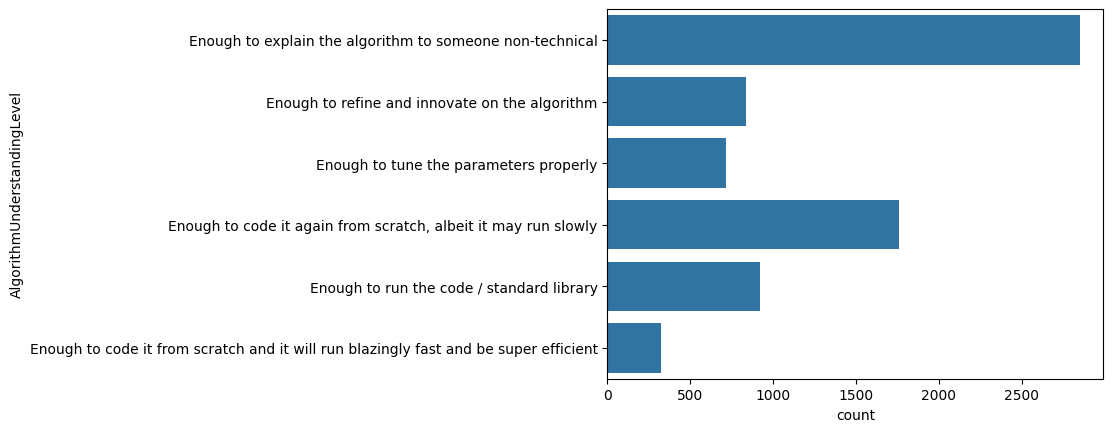

In [14]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는 게 중요하다는 응답이 그 뒤를 잇는다.

##Q16. 어디에서 일을 찾아야 할까요?

In [15]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


<Axes: title={'center': 'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

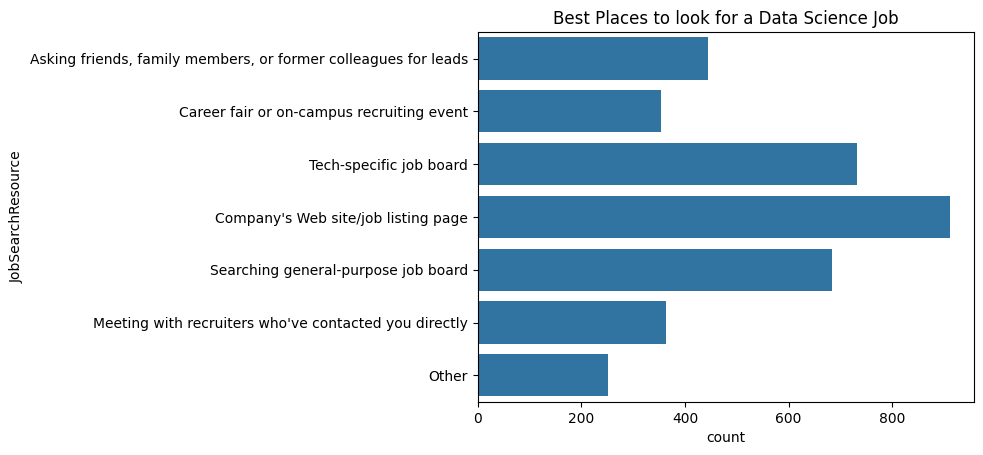

In [16]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

구직자들은 회사 웹사이트나 구직 사이트로부터 찾고 그 다음으로 특정 기술의 채용 게시판, 일반 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 채용 정보를 얻는다.

<Axes: title={'center': 'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

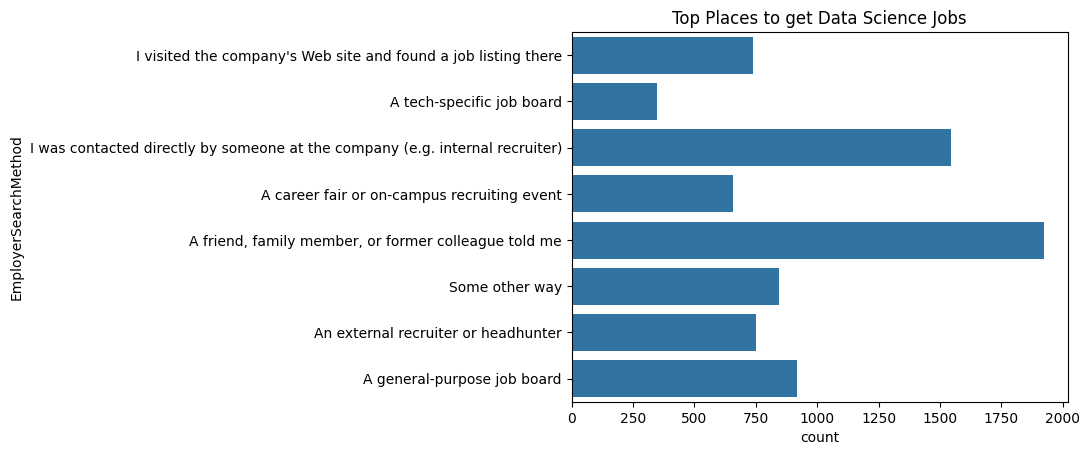

In [17]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

위에서 구직자는 주로 구직사이트로 부터 채용정보를 가장 많이 찾았으나, 채용자는 친구, 가족, 이전 직장 동료 등의 추천을 통해 가장 많이 사람을 구하며 다음으로 리쿠르터나 특정 회사에 소속 된 사람에게 직접 연락을 해서 구하는 비율이 높다.

##그럼 한국 사람들은 어떨까?

<Axes: title={'center': 'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

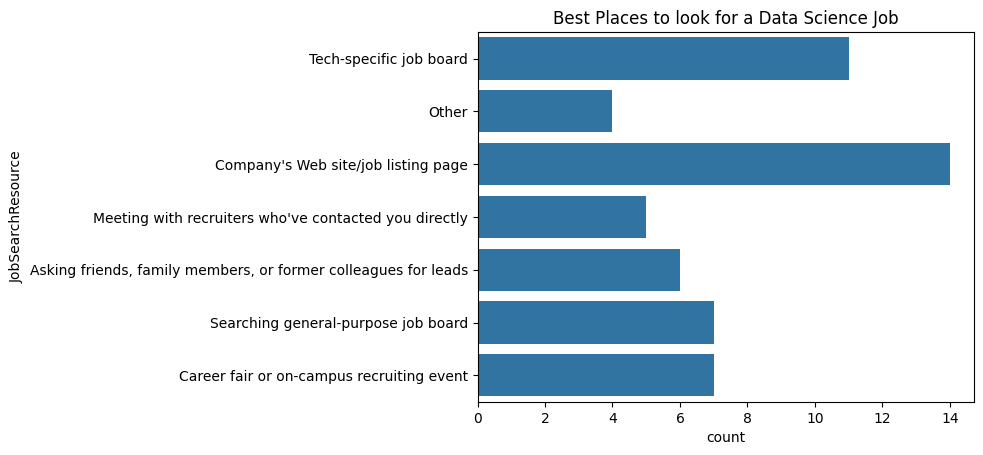

In [18]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

<Axes: title={'center': 'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

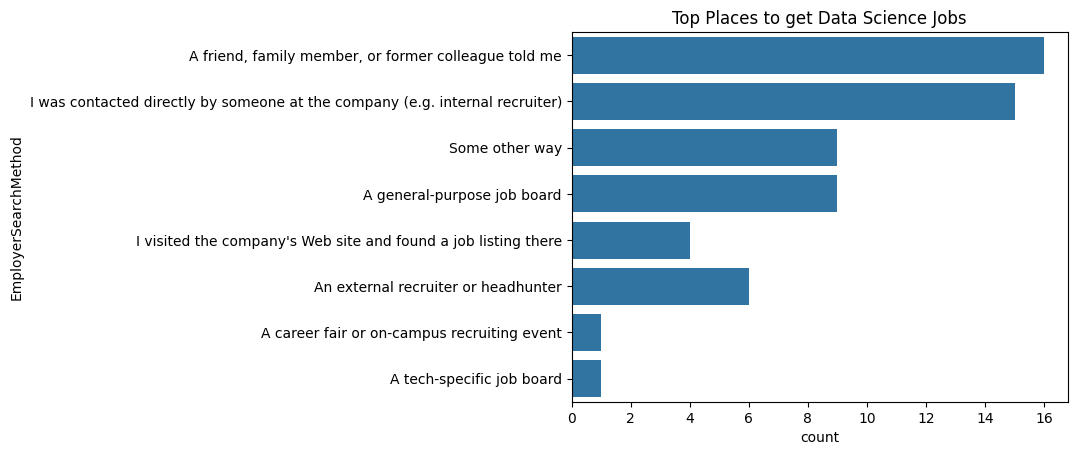

In [19]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)

#결론

* 이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
* 하지만 Python과 R을 모두 사용하는 사람도 많다.
* 데이터 수집과 정제는 어려운 일이다.(공감)
* 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
* 내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.